In [58]:
import pandas as pd
data = pd.read_csv("C:/Users/ilyay/Downloads/Sales_tech_2023_new.csv")

In [59]:
print(data.columns)

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products', 'YearMonth', 'Age_Range',
       'Brand_Numeric', 'BrandAnalysis'],
      dtype='object')


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,YearMonth,Age_Range,Brand_Numeric,BrandAnalysis
0,9663687.0,36499.0,Craig Davis,Miranda41@gmail.com,3.317931e+09,73584 Nicole Expressway,Milwaukee,Colorado,80979.0,USA,...,Bad,Standard,Debit Card,Delivered,1.0,Motorola Moto,2023-09,<20,3,<20
1,1719314.0,36562.0,Elijah Livingston,Alexis63@gmail.com,8.532184e+09,8708 Christian Forge Suite 108,Columbus,Alaska,99588.0,USA,...,Good,Standard,Debit Card,Delivered,3.0,Huawei MediaPad,2023-07,<20,3,<20
2,6613754.0,97035.0,Amanda Martinez,Anthony20@gmail.com,5.389582e+09,627 Sherry Throughway Suite 260,Wichita,New Jersey,8182.0,USA,...,Good,Standard,Cash,Delivered,4.0,Xiaomi Mi,2023-07,<20,1,<20
3,2152916.0,80183.0,Sarah Farrell,Brent88@gmail.com,2.054809e+09,8728 Ronald Rue Suite 075,Columbus,Wyoming,82350.0,USA,...,Bad,Standard,Credit Card,Delivered,1.0,Xiaomi Mi,2023-08,<20,1,<20
4,4499524.0,69780.0,Anthony Stephens,Christopher59@gmail.com,9.701382e+09,37377 Cruz Rue Apt. 769,Tulsa,Delaware,19937.0,USA,...,Good,Same-Day,Debit Card,Delivered,3.0,Razer Blade,2023-09,<20,1,<20


Correlation between Amount and Total_Amount: 0.68


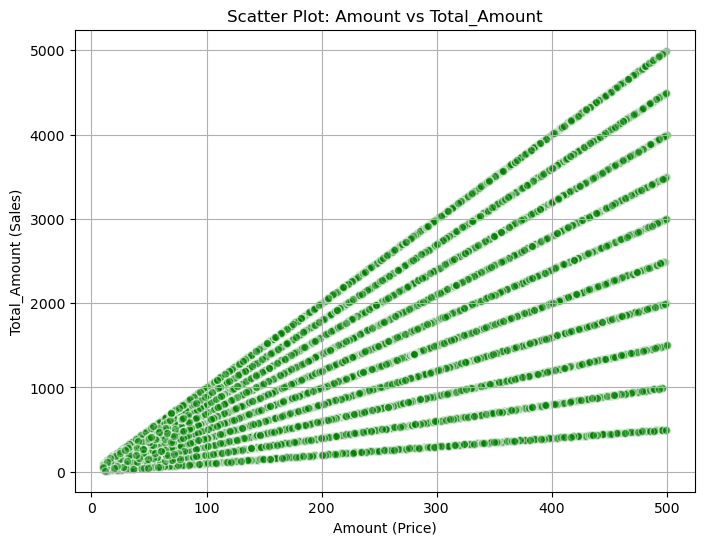

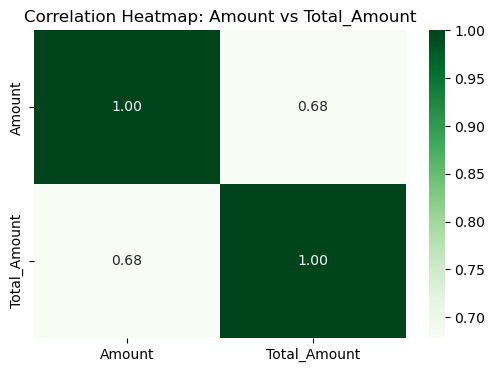

In [70]:
if 'Amount' in data.columns and 'Total_Amount' in data.columns:
    correlation = data['Amount'].corr(data['Total_Amount'])
    print(f"Correlation between Amount and Total_Amount: {correlation:.2f}")
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Amount'], data['Total_Amount'], alpha=0.5, edgecolors='w', color='green')
    plt.title('Scatter Plot: Amount vs Total_Amount')
    plt.xlabel('Amount (Price)')
    plt.ylabel('Total_Amount (Sales)')
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.heatmap(data[['Amount', 'Total_Amount']].corr(), annot=True, cmap='Greens', fmt='.2f')
    plt.title('Correlation Heatmap: Amount vs Total_Amount')
    plt.show()
else:
    print("Columns 'Amount' and/or 'Total_Amount' not found in the dataset.")


Crosstab between Product_Brand and Gender:
Gender         Female  Male
Product_Brand              
Apple            1628  2749
Samsung          1094  1859
Sony             1110  1862

Chi-Square Test Results:
Chi2 Statistic: 0.06, p-value: 0.97, Degrees of Freedom: 2


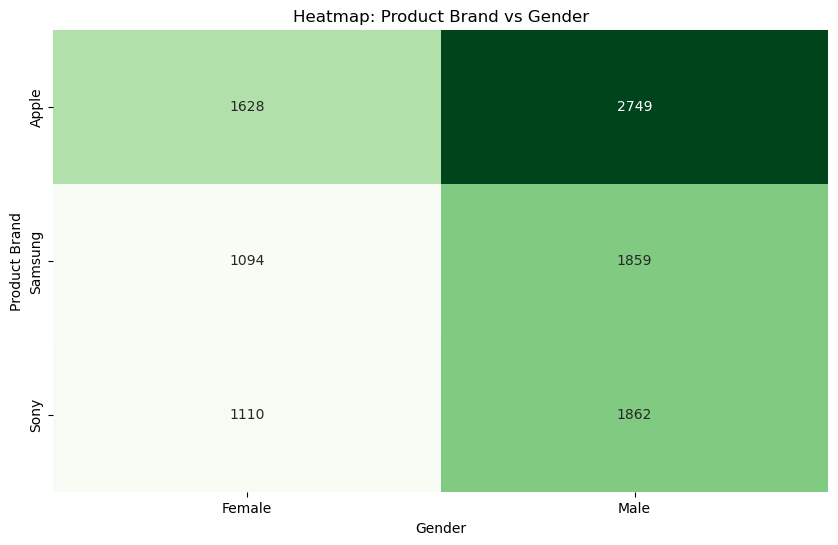

In [71]:
from scipy.stats import chi2_contingency

if 'Product_Brand' in data.columns and 'Gender' in data.columns:
    crosstab = pd.crosstab(data['Product_Brand'], data['Gender'])
    print("Crosstab between Product_Brand and Gender:")
    print(crosstab)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print("\nChi-Square Test Results:")
    print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.2f}, Degrees of Freedom: {dof}")
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, cmap="Greens", fmt="d", cbar=False)
    plt.title('Heatmap: Product Brand vs Gender')
    plt.xlabel('Gender')
    plt.ylabel('Product Brand')
    plt.show()
else:
    print("Columns 'Product_Brand' and/or 'Gender' not found in the dataset.")

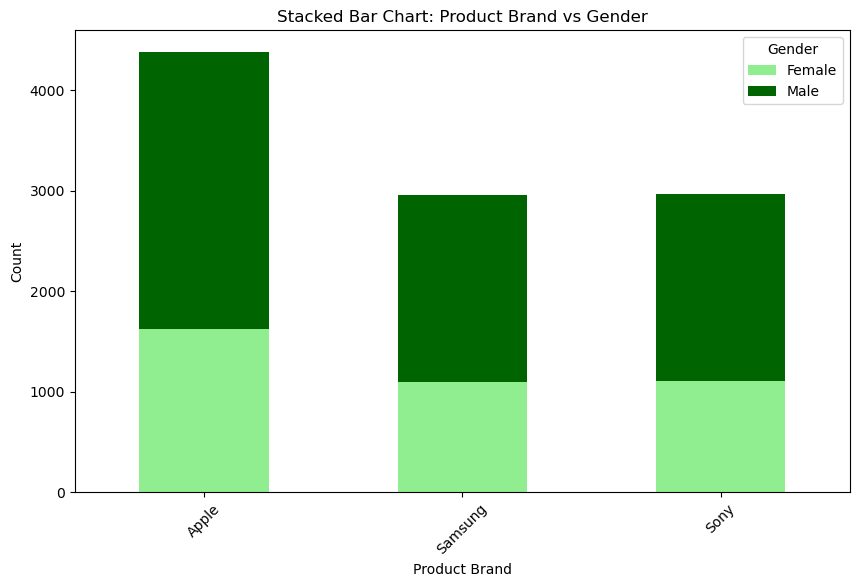

In [72]:
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'darkgreen'])
plt.title('Stacked Bar Chart: Product Brand vs Gender')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


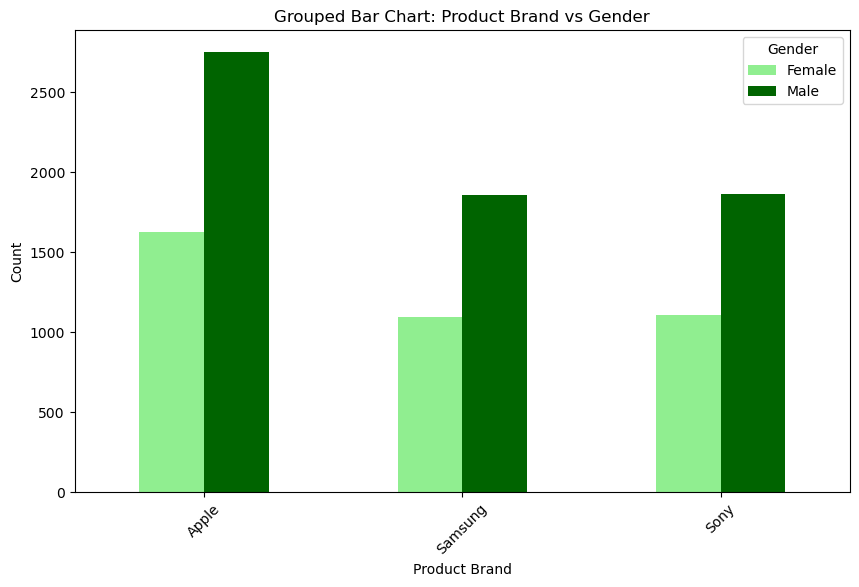

In [73]:
crosstab.plot(kind='bar', figsize=(10, 6), color=['lightgreen', 'darkgreen'])
plt.title('Grouped Bar Chart: Product Brand vs Gender')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

Products Sold by Season:
Season
Fall      2295
Spring    2899
Summer    3029
Winter    2079
Name: products, dtype: int64


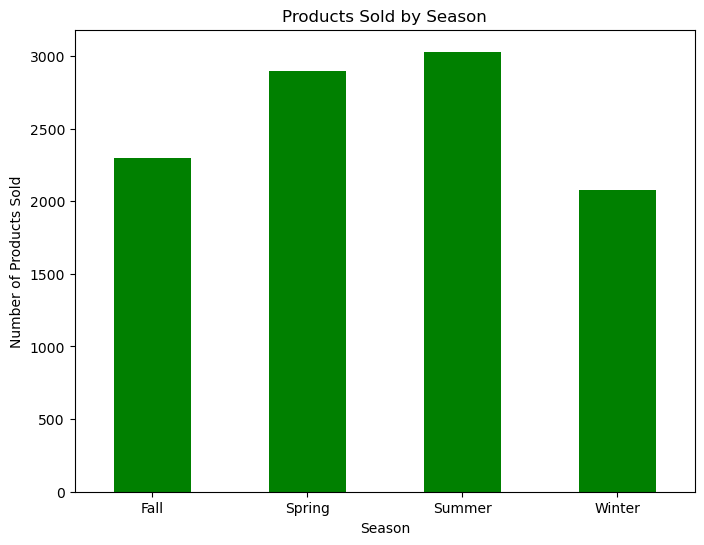

In [74]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data['Month_Num'] = data['Month'].map(month_mapping)

season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

data['Season'] = data['Month_Num'].map(season_mapping)

season_product_sales = data.groupby('Season')['products'].count()

print("Products Sold by Season:")
print(season_product_sales)
season_product_sales.sort_index(inplace=True)  # Sort seasons in order
season_product_sales.plot(kind='bar', figsize=(8, 6), color='green')
plt.title('Products Sold by Season')
plt.xlabel('Season')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=0)
plt.show()

Holiday Sales:
Black Friday: $48,859.15
Cyber Monday: $42,337.76
Christmas: $70,711.41
Average Daily Sales for November and December: $47,394.99


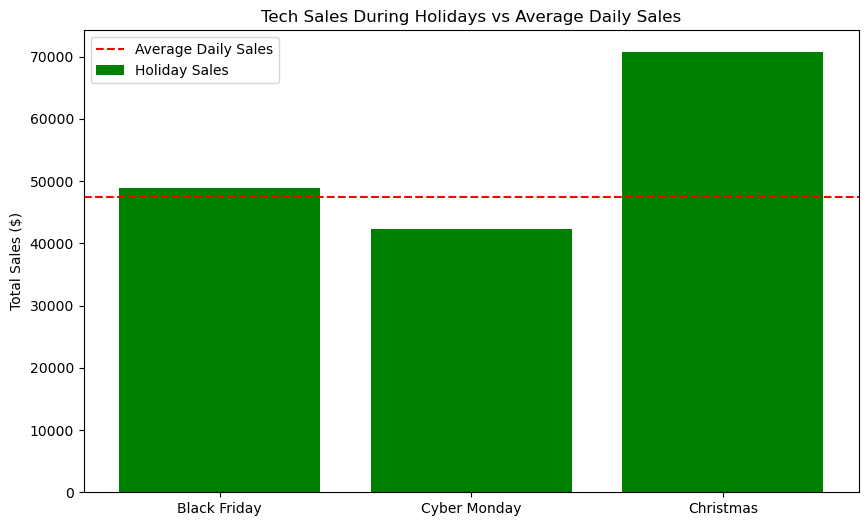

In [76]:
holiday_dates = {
    'Black Friday': '2023-11-24',
    'Cyber Monday': '2023-11-27',
    'Christmas': '2023-12-25'
}

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

holiday_sales = {}
for holiday, date in holiday_dates.items():
    holiday_sales[holiday] = data[data['Date'] == pd.Timestamp(date)]['Total_Amount'].sum()

nov_dec_sales = data[(data['Date'].dt.month.isin([11, 12]))]
average_sales = nov_dec_sales.groupby(nov_dec_sales['Date'].dt.date)['Total_Amount'].sum().mean()


print("Holiday Sales:")
for holiday, sales in holiday_sales.items():
    print(f"{holiday}: ${sales:,.2f}")
print(f"Average Daily Sales for November and December: ${average_sales:,.2f}")

plt.figure(figsize=(10, 6))
holiday_labels = list(holiday_sales.keys())
holiday_values = list(holiday_sales.values())
plt.bar(holiday_labels, holiday_values, color='green', label='Holiday Sales')
plt.axhline(y=average_sales, color='red', linestyle='--', label='Average Daily Sales')
plt.title('Tech Sales During Holidays vs Average Daily Sales')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()


In [77]:
print(data['Income'].unique())


['Medium' 'High' 'Low']


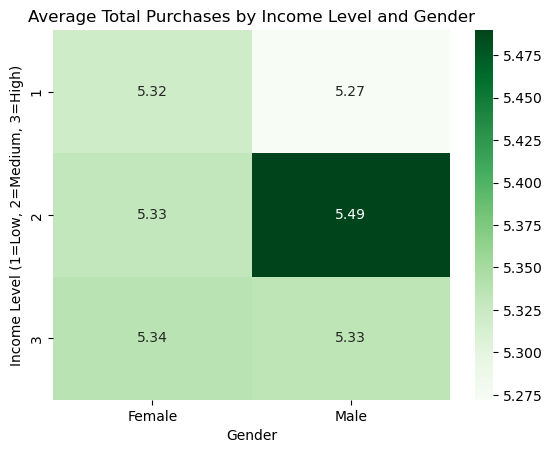

In [89]:
grouped_data = data.groupby(['Gender', 'Income_Numeric'])['Total_Purchases'].mean().reset_index()
pivot_table = grouped_data.pivot(index='Income_Numeric', columns='Gender', values='Total_Purchases')
sns.heatmap(pivot_table, annot=True, cmap='Greens', fmt=".2f", cbar=True)
plt.title('Average Total Purchases by Income Level and Gender')
plt.xlabel('Gender')
plt.ylabel('Income Level (1=Low, 2=Medium, 3=High)')
plt.show()



C:\Users\ilyay\AppData\Local\Temp\ipykernel_7160\3675434732.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




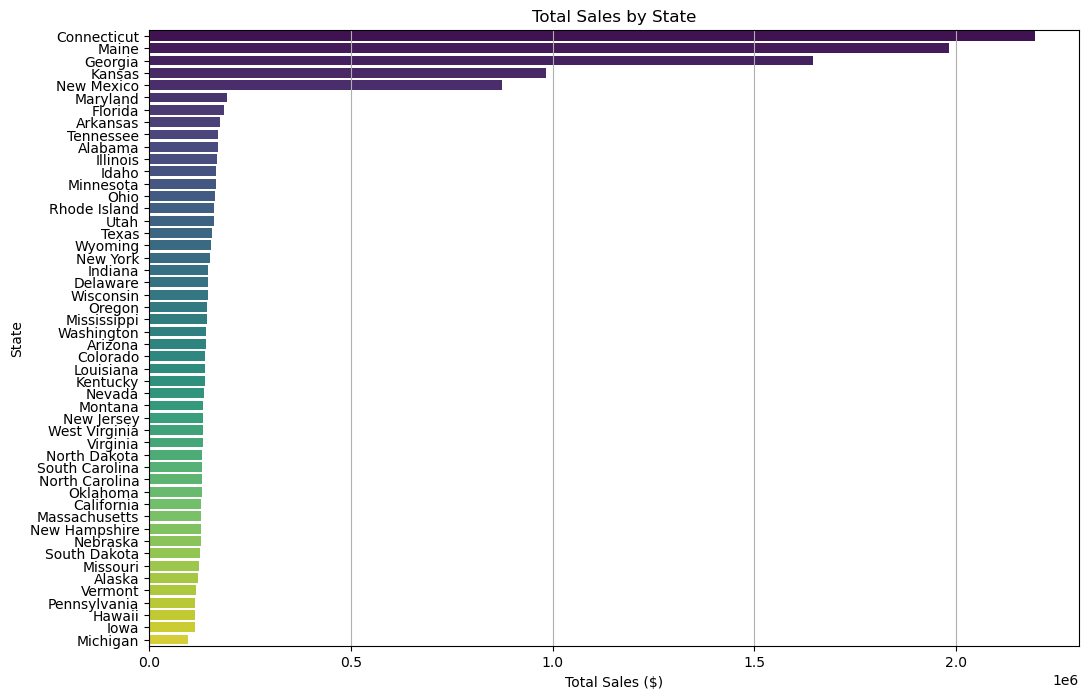

In [79]:
if 'State' in data.columns and 'Total_Amount' in data.columns:
    state_sales = data.groupby('State')['Total_Amount'].sum().reset_index()
    state_sales = state_sales.sort_values(by='Total_Amount', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Total_Amount',
        y='State',
        data=state_sales,
        palette='viridis'
    )
    plt.title('Total Sales by State')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('State')
    plt.grid(axis='x')
    plt.show()
else:
    print("Columns 'State' and/or 'Total_Amount' are missing in the dataset.")


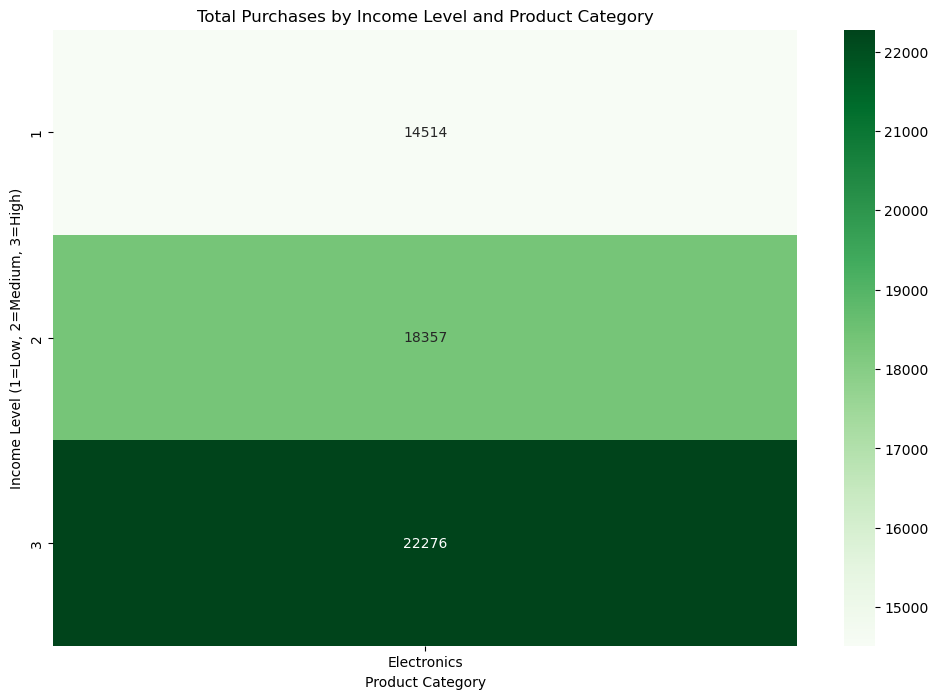

<Figure size 1200x800 with 0 Axes>

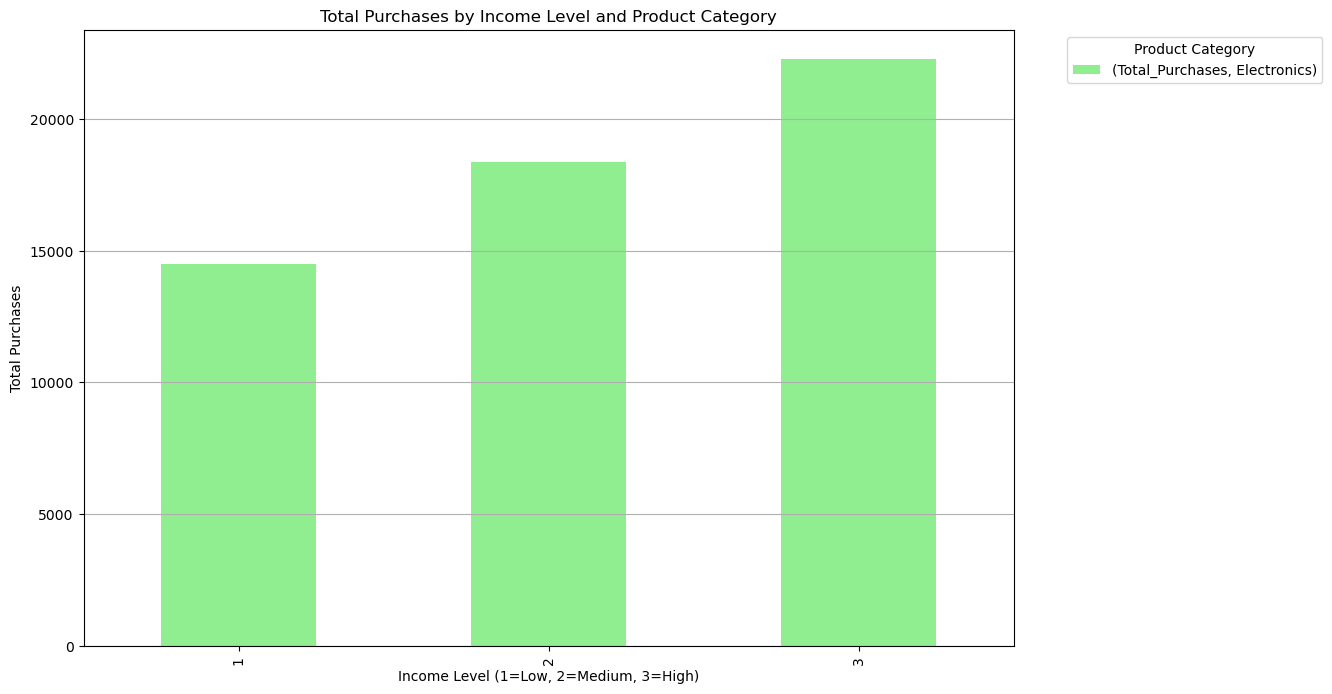

In [80]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Income_Numeric'] = data['Income'].map(income_mapping)

if 'Income_Numeric' in data.columns and 'Product_Category' in data.columns and 'Total_Purchases' in data.columns:
    income_category_data = data.groupby(['Income_Numeric', 'Product_Category'])['Total_Purchases'].sum().reset_index()

    pivot_table = income_category_data.pivot(index='Income_Numeric', columns='Product_Category', values='Total_Purchases')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Greens", cbar=True)  # Changed colormap to "Greens"
    plt.title('Total Purchases by Income Level and Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Income Level (1=Low, 2=Medium, 3=High)')
    plt.show()
    plt.figure(figsize=(12, 8))
    income_category_data.groupby(['Income_Numeric', 'Product_Category']).sum().unstack().plot(
        kind='bar', stacked=True, figsize=(12, 8), color=['lightgreen', 'mediumseagreen', 'darkgreen']
    )
    plt.title('Total Purchases by Income Level and Product Category')
    plt.xlabel('Income Level (1=Low, 2=Medium, 3=High)')
    plt.ylabel('Total Purchases')
    plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    plt.show()

else:
    print("Columns 'Income_Numeric', 'Product_Category', and/or 'Total_Purchases' are missing.")



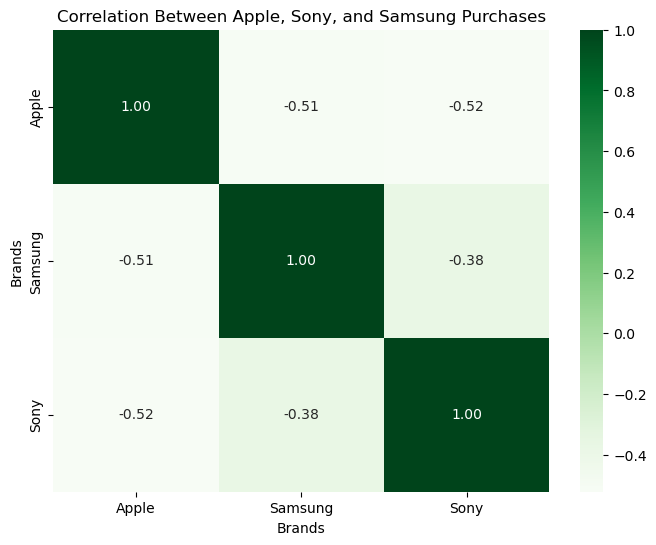

In [82]:
if 'Customer_ID' in data.columns and 'Product_Brand' in data.columns:
    brands = ['Apple', 'Sony', 'Samsung']
    filtered_data = data[data['Product_Brand'].isin(brands)]

    customer_brand_matrix = filtered_data.pivot_table(
        index='Customer_ID',
        columns='Product_Brand',
        values='Total_Purchases',
        aggfunc='sum',
        fill_value=0
    )

    customer_brand_matrix = (customer_brand_matrix > 0).astype(int)

    correlation_matrix = customer_brand_matrix.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", cbar=True)
    plt.title('Correlation Between Apple, Sony, and Samsung Purchases')
    plt.xlabel('Brands')
    plt.ylabel('Brands')
    plt.show()

else:
    print("Columns 'Customer_ID', 'Product_Brand', and/or 'Total_Purchases' are missing.")



In [83]:
sony_customers = set(data[data['Product_Brand'] == 'Sony']['Customer_ID'])
samsung_customers = set(data[data['Product_Brand'] == 'Samsung']['Customer_ID'])
overlap = sony_customers & samsung_customers
print(f"Number of overlapping customers: {len(overlap)}")


Number of overlapping customers: 102


In [84]:
sony_products = data[data['Product_Brand'] == 'Sony']['Product_Category'].value_counts()
samsung_products = data[data['Product_Brand'] == 'Samsung']['Product_Category'].value_counts()
print("Sony Products:\n", sony_products)
print("Samsung Products:\n", samsung_products)


Sony Products:
 Product_Category
Electronics    2972
Name: count, dtype: int64
Samsung Products:
 Product_Category
Electronics    2953
Name: count, dtype: int64


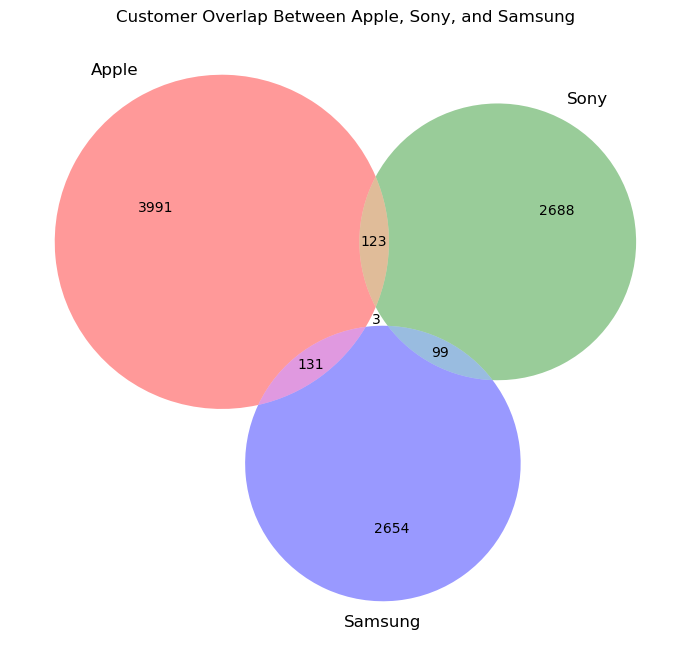

In [55]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
if 'Customer_ID' in data.columns and 'Product_Brand' in data.columns:
    apple_customers = set(data[data['Product_Brand'] == 'Apple']['Customer_ID'])
    sony_customers = set(data[data['Product_Brand'] == 'Sony']['Customer_ID'])
    samsung_customers = set(data[data['Product_Brand'] == 'Samsung']['Customer_ID'])
    plt.figure(figsize=(10, 8))
    venn3([apple_customers, sony_customers, samsung_customers], ('Apple', 'Sony', 'Samsung'))
    plt.title('Customer Overlap Between Apple, Sony, and Samsung')
    plt.show()
else:
    print("Columns 'Customer_ID' and/or 'Product_Brand' are missing in the dataset.")


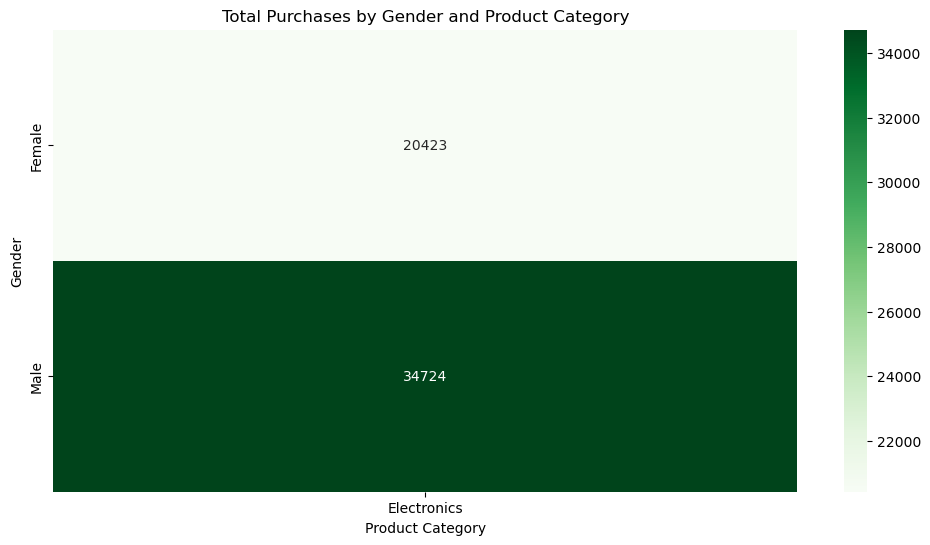

In [85]:
if 'Gender' in data.columns and 'Total_Purchases' in data.columns and 'Product_Category' in data.columns:
    gender_category_purchases = data.groupby(['Gender', 'Product_Category'])['Total_Purchases'].sum().reset_index()

    pivot_table = gender_category_purchases.pivot(
        index='Gender',
        columns='Product_Category',
        values='Total_Purchases'
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_table,
        annot=True,
        fmt=".0f",
        cmap="Greens",  
        cbar=True
    )
    plt.title('Total Purchases by Gender and Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Gender')
    plt.show()

else:
    print("Columns 'Gender', 'Total_Purchases', and/or 'Product_Category' are missing in the dataset.")

